## Modelo de classificação não supervisionado

In [1]:
### importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importando dados
df = pd.read_excel('economatica.xlsx', skiprows=3, index_col='Código')

#### Tratando os dados

In [3]:
### Linpandao colunas que não serão utilizadas
df.drop(['Unnamed: 0', 'Ativo /\nCancelado', 'Classe', 'Nome','Bolsa / Fonte', 'Tipo de Ativo', 'Setor\nEconomatica', 'Setor NAICS\nult disponiv', 'Subsetor Bovespa', 'Data da\nÚlt Cotação', 'Data do\nÚltimo\nBalanço', 'Consolidado', 'Link da\nÚltima\nNota\nExplicativa', 'Data do\nMáximo de\n52 semanas'], axis=1, inplace=True)


In [4]:
### Modificando variaves categóricas em numéricas
df = pd.get_dummies(df, columns=['Segmento listagem\nBovespa'])
df.replace('-', np.nan, inplace=True) ### renomeando dados ausentes

In [5]:
### Excluindo linhas em branco
df = df.dropna()
df.isna().sum() ### contando valores nulos

Participação\nno Ibovespa\n\nem %                 0
Valor de\nMercado\nAtual\nem milhares             0
Valor de\nMercado\n1 ano atrás\nem milhares       0
Variação\nValor de Merc\nem 1 ano\nem milhares    0
Enterprise\nValue\n\nem milhares                  0
                                                 ..
Setor Econômico\nBovespa                          0
Segmento listagem\nBovespa_Novo Mercado           0
Segmento listagem\nBovespa_Nível 1                0
Segmento listagem\nBovespa_Nível 2                0
Segmento listagem\nBovespa_Tradicional            0
Length: 61, dtype: int64

In [21]:
### Criando base de treinamento
X = df.drop(['Setor Econômico\nBovespa'], axis=1) ### excluindo target da base de treinameto X
X = X[:50].values ### dados para o modelo
X_test = X[-10:]

#### Rodando o modelo

In [38]:
### Encontrando número ideal de clusters
ks = range(1, 8)
inertia = []
for k in ks:
    model = KMeans()
    model.fit(X)
    inertia.append(model.inertia_)

In [39]:
ks

range(1, 8)

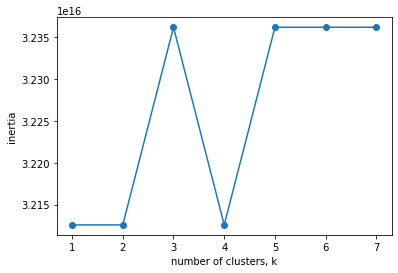

In [40]:
### Plotando gráficos
plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [16]:
clusters = 5 ### quantidade de clusters que o modelo terá
model = KMeans(n_clusters=clusters)
model.fit(X)

KMeans(n_clusters=5)

In [24]:
### Previsão
labels = model.predict(X_test)

#### Plotando gráfico

In [29]:
px = X_test[:,0]
py = X_test[:,-1]
centro = model.cluster_centers_
centro_x = centro[:,0]
centro_y = centro[:,1]

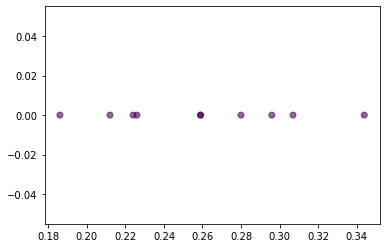

In [33]:
plt.scatter(px, py, c=labels, alpha=0.6)
#plt.scatter(centro_x, centro_y, marker='*', s=50)
plt.show()

array([ 0.619675,  5.7275  , 15.244   ,  2.998   ,  2.0845  ])